In [1]:
import os.path
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
from parameter_extractor import ParameterExtractor, Property

IPythonConsole.molSize = (300, 300)  # Change image size
DrawingOptions.bondLineWidth = 1.8

In [2]:
filename = "l_15"
path = f"./out/spe/{filename}_SPE.out"
path_no_rh = f"./out/spe_no_rh/{filename}_SPE_NoRh.out"
if not os.path.exists(path_no_rh):
    print(path_no_rh + " does not exist")

In [3]:
comp = ParameterExtractor(path=path, no_rh_path=path_no_rh)

In [8]:
bite_angle = comp.get_angle(comp.p1, comp.rh, comp.p2)
p1_rh_dist = comp.get_bond_distance(comp.p1, comp.rh)
p2_rh_dist = comp.get_bond_distance(comp.p2, comp.rh)
p1_bridge_dist = comp.get_bond_distance(comp.p1, comp.bridge)
p2_bridge_dist = comp.get_bond_distance(comp.p2, comp.bridge)
bridge_angle = comp.get_angle(comp.p1, comp.bridge, comp.p2)

print("P1-Rh: " + str(p1_rh_dist), "P2-Rh: " + str(p2_rh_dist), "P1-Bridge: " + str(p1_bridge_dist),
      "P2-Bridge: " + str(p2_bridge_dist), "Bite angle: " + str(bite_angle), "Bridge angle: " + str(bridge_angle))

P1-Rh: 2.3719312711164293 P2-Rh: 2.37194201200198 P1-Bridge: 1.8750391887104654 P2-Bridge: 1.8749946723657644 Bite angle: 72.70956883041772 Bridge angle: 97.16063672571833


In [9]:
comp.dipole

1.9588

In [10]:
r1_p1_r2_angle = comp.get_angle(comp.r1, comp.p1, comp.r2)
r1_p1_rh_angle = comp.get_angle(comp.r1, comp.p1, comp.rh)
rh_p1_bridge_angle = comp.get_angle(comp.rh, comp.p1, comp.bridge)
r1_p1_bridge_angle = comp.get_angle(comp.r1, comp.p1, comp.bridge)
r2_p1_bridge_angle = comp.get_angle(comp.r2, comp.p1, comp.bridge)
r2_p1_rh_angle = comp.get_angle(comp.r2, comp.p1, comp.rh)

p1_angle_sum = r1_p1_bridge_angle + r1_p1_r2_angle + r2_p1_bridge_angle
p1_angle_sum

317.8066693255203

In [11]:
r3_p2_r4_angle = comp.get_angle(comp.r3, comp.p2, comp.r4)
r3_p2_rh_angle = comp.get_angle(comp.r3, comp.p2, comp.rh)
rh_p2_bridge_angle = comp.get_angle(comp.rh, comp.p2, comp.bridge)
r3_p2_bridge_angle = comp.get_angle(comp.r3, comp.p2, comp.bridge)
r4_p2_bridge_angle = comp.get_angle(comp.r4, comp.p2, comp.bridge)
r4_p2_rh_angle = comp.get_angle(comp.r4, comp.p2, comp.rh)

p2_angle_sum = r3_p2_bridge_angle + r3_p2_r4_angle + r4_p2_bridge_angle
p2_angle_sum

317.80297812394565

In [4]:
comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY)

'0.05997'

In [13]:
comp.p1.GetPropsAsDict()

{'nbo_charge': 1.1076,
 'nmr_isotropic': 319.369,
 'nmr_anisotropic': 118.7911,
 'molAtomMapNumber': 38,
 'nbo_charge_no_rh': 0.79838,
 'nmr_isotropic_no_rh': 241.6574,
 'nmr_anisotropic_no_rh': 93.1935,
 'lone_pair_occupancy_no_rh_1': 1.93141,
 'lone_pair_energy_no_rh_1': -0.33356}

In [5]:
df = pd.DataFrame()
param_list = []
for file in os.listdir("./out/spe/"):
    filename = file.split(".")[0]
    ligand_name = filename.replace("_SPE", "")
    path = f"./out/spe/{filename}.out"
    path_no_rh = f"./out/spe_no_rh/{filename}_NoRh.out"
    if not os.path.exists(path_no_rh):
        print(path_no_rh + " does not exist")
        continue
        
    print(ligand_name + ": Parameter extraction started.")
    comp = ParameterExtractor(path=path, no_rh_path=path_no_rh)
    
    r1_p1_r2_angle = comp.get_angle(comp.r1, comp.p1, comp.r2)
    r1_p1_rh_angle = comp.get_angle(comp.r1, comp.p1, comp.rh)
    rh_p1_bridge_angle = comp.get_angle(comp.rh, comp.p1, comp.bridge)
    r1_p1_bridge_angle = comp.get_angle(comp.r1, comp.p1, comp.bridge)
    r2_p1_bridge_angle = comp.get_angle(comp.r2, comp.p1, comp.bridge)
    r2_p1_rh_angle = comp.get_angle(comp.r2, comp.p1, comp.rh)
    
    p1_angle_sum = r1_p1_bridge_angle + r1_p1_r2_angle + r2_p1_bridge_angle
    
    r3_p2_r4_angle = comp.get_angle(comp.r3, comp.p2, comp.r4)
    r3_p2_rh_angle = comp.get_angle(comp.r3, comp.p2, comp.rh)
    rh_p2_bridge_angle = comp.get_angle(comp.rh, comp.p2, comp.bridge)
    r3_p2_bridge_angle = comp.get_angle(comp.r3, comp.p2, comp.bridge)
    r4_p2_bridge_angle = comp.get_angle(comp.r4, comp.p2, comp.bridge)
    r4_p2_rh_angle = comp.get_angle(comp.r4, comp.p2, comp.rh)
    
    p2_angle_sum = r3_p2_bridge_angle + r3_p2_r4_angle + r4_p2_bridge_angle
    param_dict = {
        # Global parameters
        "ligand": ligand_name,
        "homo": comp.homo,
        "lumo": comp.lumo,
        "dipole": comp.dipole,
        "rh_charge": comp.rh.get_prop(Property.CHARGE),
        "rh_LP_1_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_1),
        "rh_LP_1_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_1),
        "rh_LP_2_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_2),
        "rh_LP_2_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_2),
        "rh_LP_3_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_3),
        "rh_LP_3_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_3),
        "rh_LP_4_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_4),
        "rh_LP_4_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_4),
        "bite_angle": comp.get_angle(comp.p1, comp.bridge, comp.p2),
        "homo_no_rh": comp.homo_no_rh,
        "lumo_no_rh": comp.lumo_no_rh,
        "dipole_no_rh": comp.dipole_no_rh,
        # missing polarizability, I don't know where to get it from, but does not seem important
        
        # C1 parameters
        "r1_nbo": comp.r1.get_prop(Property.CHARGE),
        "r2_nbo": comp.r2.get_prop(Property.CHARGE),
        "r3_nbo": comp.r3.get_prop(Property.CHARGE),
        "r4_nbo": comp.r4.get_prop(Property.CHARGE),
        "bridge_nbo": comp.bridge.get_prop(Property.CHARGE),
        "p1_nbo": comp.p1.get_prop(Property.CHARGE),
        "p2_nbo": comp.p2.get_prop(Property.CHARGE),
        "c1_nbo": comp.c1.get_prop(Property.CHARGE),
        "c2_nbo": comp.c2.get_prop(Property.CHARGE),
        "c3_nbo": comp.c3.get_prop(Property.CHARGE),
        "c4_nbo": comp.c4.get_prop(Property.CHARGE),
        
        "p1_nmr": comp.p1.get_prop(Property.NMR_ISOTROPIC),
        "p1_nmr_aniso": comp.p1.get_prop(Property.NMR_ANISOTROPIC),
        "p2_nmr": comp.p2.get_prop(Property.NMR_ISOTROPIC),
        "p2_nmr_aniso": comp.p2.get_prop(Property.NMR_ANISOTROPIC),
        
        "p1_rh_bond_occ": comp.get_bond(comp.p1, comp.rh).get_prop(Property.BOND_OCCUPANCY),
        "p2_rh_bond_occ": comp.get_bond(comp.p2, comp.rh).get_prop(Property.BOND_OCCUPANCY),
        "p1_rh_bond_eng": comp.get_bond(comp.p1, comp.rh).get_prop(Property.BOND_ENERGY),
        "p2_rh_bond_eng": comp.get_bond(comp.p2, comp.rh).get_prop(Property.BOND_ENERGY),
        "p1_rh_antibond_occ": comp.get_bond(comp.p1, comp.rh).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_rh_antibond_occ": comp.get_bond(comp.p2, comp.rh).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_rh_antibond_eng": comp.get_bond(comp.p1, comp.rh).get_prop(Property.ANTIBOND_ENERGY),
        "p2_rh_antibond_eng": comp.get_bond(comp.p2, comp.rh).get_prop(Property.ANTIBOND_ENERGY),
        "p1_r1_bond_occ": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_OCCUPANCY),
        "p1_r2_bond_occ": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_OCCUPANCY),
        "p2_r3_bond_occ": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_OCCUPANCY),
        "p2_r4_bond_occ": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_OCCUPANCY),
        "p1_r1_bond_eng": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_ENERGY),
        "p1_r2_bond_eng": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_ENERGY),
        "p2_r3_bond_eng": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_ENERGY),
        "p2_r4_bond_eng": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_ENERGY),
        "p1_r1_antibond_occ": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_r2_antibond_occ": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_r3_antibond_occ": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_r4_antibond_occ": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_r1_antibond_eng": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_ENERGY),
        "p1_r2_antibond_eng": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_ENERGY),
        "p2_r3_antibond_eng": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_ENERGY),
        "p2_r4_antibond_eng": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_ENERGY),
        "p1_bridge_bond_occ": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_OCCUPANCY),
        "p2_bridge_bond_occ": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_OCCUPANCY),
        "p1_bridge_bond_eng": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_ENERGY),
        "p2_bridge_bond_eng": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_ENERGY),
        "p1_bridge_antibond_occ": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_bridge_antibond_occ": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_bridge_antibond_eng": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_ENERGY),
        "p2_bridge_antibond_eng": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_ENERGY),
        
        "c1_rh_dist": comp.get_bond_distance(comp.c1, comp.rh),
        "c2_rh_dist": comp.get_bond_distance(comp.c2, comp.rh),
        "c3_rh_dist": comp.get_bond_distance(comp.c3, comp.rh),
        "c4_rh_dist": comp.get_bond_distance(comp.c4, comp.rh),
        "p1_c1_dist": comp.get_bond_distance(comp.p1, comp.c1),
        "p1_c2_dist": comp.get_bond_distance(comp.p1, comp.c2),
        "p2_c3_dist": comp.get_bond_distance(comp.p2, comp.c3),
        "p2_c4_dist": comp.get_bond_distance(comp.p2, comp.c4),
        "p1_bridge_dist": comp.get_bond_distance(comp.p1, comp.bridge),
        "p2_bridge_dist": comp.get_bond_distance(comp.p2, comp.bridge),
        
        "p1_angle_sum": p1_angle_sum,
        "p2_angle_sum": p2_angle_sum,
        "rh_p1_bridge_angle": rh_p1_bridge_angle,
        "rh_p2_bridge_angle": rh_p2_bridge_angle,
        "r1_p1_rh_angle": r1_p1_rh_angle,
        "r2_p1_rh_angle": r2_p1_rh_angle,
        "r3_p2_rh_angle": r3_p2_rh_angle,
        "r4_p2_rh_angle": r4_p2_rh_angle,
        "r1_p1_bridge_angle": r1_p1_bridge_angle,
        "r2_p1_bridge_angle": r2_p1_bridge_angle,
        "r3_p2_bridge_angle": r3_p2_bridge_angle,
        "r4_p2_bridge_angle": r4_p2_bridge_angle,
        
        "p1_nbo_no_rh": comp.p1.get_prop(Property.CHARGE_NO_RH),
        "p2_nbo_no_rh": comp.p2.get_prop(Property.CHARGE_NO_RH),
        "r1_nbo_no_rh": comp.r1.get_prop(Property.CHARGE_NO_RH),
        "r2_nbo_no_rh": comp.r2.get_prop(Property.CHARGE_NO_RH),
        "r3_nbo_no_rh": comp.r3.get_prop(Property.CHARGE_NO_RH),
        "r4_nbo_no_rh": comp.r4.get_prop(Property.CHARGE_NO_RH),
        "bridge_nbo_no_rh": comp.bridge.get_prop(Property.CHARGE_NO_RH),
        
        "p1_nmr_no_rh": comp.p1.get_prop(Property.NMR_ISOTROPIC_NO_RH),
        "p1_nmr_aniso_no_rh": comp.p1.get_prop(Property.NMR_ANISOTROPIC_NO_RH),
        "p2_nmr_no_rh": comp.p2.get_prop(Property.NMR_ISOTROPIC_NO_RH),
        "p2_nmr_aniso_no_rh": comp.p2.get_prop(Property.NMR_ANISOTROPIC_NO_RH),
        
        "p1_LP_occ_no_rh": comp.p1.get_prop(Property.LONE_PAIR_OCCUPANCY_NO_RH_1),
        "p1_LP_eng_no_rh": comp.p1.get_prop(Property.LONE_PAIR_ENERGY_NO_RH_1),
        "p2_LP_occ_no_rh": comp.p2.get_prop(Property.LONE_PAIR_OCCUPANCY_NO_RH_1),
        "p2_LP_eng_no_rh": comp.p2.get_prop(Property.LONE_PAIR_ENERGY_NO_RH_1),
        
        "p1_r1_bond_occ_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_r2_bond_occ_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_r3_bond_occ_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_r4_bond_occ_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_r1_bond_eng_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_r2_bond_eng_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_r3_bond_eng_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_r4_bond_eng_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_r1_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_r2_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_r3_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_r4_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_r1_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p1_r2_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_r3_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_r4_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p1_bridge_bond_occ_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_bridge_bond_occ_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_bridge_bond_eng_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_bridge_bond_eng_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_bridge_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_bridge_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_bridge_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_bridge_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        
        "p1_LP_s_occ_no_rh": comp.p1.get_prop(Property.LONE_PAIR_S_ORBITAL_NO_RH),
        "p2_LP_s_occ_no_rh": comp.p2.get_prop(Property.LONE_PAIR_S_ORBITAL_NO_RH),
    }
    
    
    for radius in range(1, 7, 1):
        bv = comp.buried_volume(radius)
        bv.octant_analysis()
        param_dict[f"Vbur%_{float(radius)}"] = bv.fraction_buried_volume * 100
        param_dict[f"NE_{float(radius)}"] = bv.quadrants["percent_buried_volume"][1]
        param_dict[f"NW_{float(radius)}"] = bv.quadrants["percent_buried_volume"][2]
        param_dict[f"SE_{float(radius)}"] = bv.quadrants["percent_buried_volume"][3]
        param_dict[f"SW_{float(radius)}"] = bv.quadrants["percent_buried_volume"][4]
        
    param_list.append(param_dict)
df = pd.DataFrame(param_list)

l_10: Parameter extraction started.
l_11: Parameter extraction started.
l_12: Parameter extraction started.
l_13: Parameter extraction started.
l_14: Parameter extraction started.
l_15: Parameter extraction started.
BOND_OCCUPANCY not found for bond Rh 52 - P 51
BOND_ENERGY not found for bond Rh 52 - P 51
ANTIBOND_OCCUPANCY not found for bond Rh 52 - P 51
ANTIBOND_ENERGY not found for bond Rh 52 - P 51
l_16: Parameter extraction started.
l_17: Parameter extraction started.
l_18: Parameter extraction started.
LONE_PAIR_OCCUPANCY_NO_RH_1 not found for atom P 1
LONE_PAIR_ENERGY_NO_RH_1 not found for atom P 1
LONE_PAIR_S_ORBITAL_NO_RH not found for atom P 1
l_19: Parameter extraction started.
l_1: Parameter extraction started.
l_20b: Parameter extraction started.
l_21: Parameter extraction started.
l_22: Parameter extraction started.
l_23: Parameter extraction started.
l_24: Parameter extraction started.
l_25: Parameter extraction started.
l_26: Parameter extraction started.
BOND_OCCUPANCY

In [6]:
df

,ligand,homo,lumo,dipole,rh_charge,rh_LP_1_occ,rh_LP_1_eng,rh_LP_2_occ,rh_LP_2_eng,rh_LP_3_occ,...,Vbur%_5.0,NE_5.0,NW_5.0,SE_5.0,SW_5.0,Vbur%_6.0,NE_6.0,NW_6.0,SE_6.0,SW_6.0
0,l_10,-0.30854,-0.16412,1.1953,-0.34364,1.98349,-0.31041,1.95575,-0.36266,1.79816,...,47.547972,48.651887,47.794929,43.971335,49.773738,41.669010,41.205950,39.813597,42.782893,42.873600
1,l_11,-0.31317,-0.16905,0.9229,-0.34856,1.98359,-0.31525,1.95533,-0.36772,1.80166,...,46.591482,48.582511,47.676674,40.320394,49.786352,40.032088,41.217289,39.523788,36.600299,42.786974
2,l_12,-0.30549,-0.16352,2.3293,-0.36670,1.98320,-0.30691,1.95379,-0.36021,1.80175,...,45.282591,43.561382,48.429567,42.458453,46.680962,40.699692,42.602386,43.156606,37.779038,39.260737
3,l_13,-0.31265,-0.16971,1.7843,-0.36261,1.98181,-0.31413,1.95395,-0.36583,1.80299,...,43.330784,39.500489,47.777585,37.959226,48.085838,38.352760,35.898227,39.662570,34.694544,43.155699
4,l_14,-0.30035,-0.15854,3.2379,-0.30737,1.98268,-0.30211,1.95468,-0.35516,1.80823,...,48.973936,51.113178,49.822617,48.860017,46.099934,44.799197,49.058914,43.492222,41.844075,44.801578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,l_8,-0.31190,-0.16571,1.6657,-0.35261,1.98477,-0.31359,1.95807,-0.36465,1.80738,...,45.481655,49.396109,47.776797,37.308820,47.444893,36.941698,41.332487,39.809062,25.836546,40.788698
73,l_90,-0.30978,-0.16505,1.7988,-0.35457,1.97948,-0.31016,1.95435,-0.36466,1.80425,...,45.183060,49.809214,45.767242,38.026237,47.129545,40.547077,48.033924,38.585423,32.342963,43.225997
74,l_91,-0.30633,-0.16210,0.4263,-0.35034,1.97891,-0.30601,1.95465,-0.36093,1.80426,...,45.964728,49.798177,46.883574,39.054271,48.122891,42.622001,48.312849,42.412808,35.907751,43.854597
75,l_92,-0.30761,-0.16360,1.6455,-0.32650,1.98221,-0.30585,1.95789,-0.36148,1.79773,...,49.860853,51.970925,49.479676,48.865536,49.127274,44.381264,49.147354,41.745204,41.991927,44.640573


In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "parameters.csv"  # Path to your uploaded CSV file
data = pd.read_csv(file_path)

# Separate the `ligand` column
ligand_column = data['ligand']
data_numeric = data.drop(columns=['ligand'])
data_numeric = data_numeric.fillna(data_numeric.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Save the transformed data to a new CSV file
pca_df = pd.DataFrame(data_pca, columns=['Component 1', 'Component 2', 'Component 3'])
pca_df['ligand'] = ligand_column.values
# output_file = "/mnt/data/pca_output.csv"
# pca_df.to_csv(output_file, index=False)
#
# print(f"PCA completed. Transformed data saved to {output_file}")
pca_df

,Component 1,Component 2,Component 3,ligand
0,8.093236,1.313835,-4.983577,l_10
1,7.622714,0.475867,-5.425420,l_11
2,6.274783,-2.702533,-3.772521,l_12
3,5.688125,-2.710999,-3.770130,l_13
4,7.156774,4.147142,-2.165011,l_14
...,...,...,...,...
72,6.771610,-2.308250,-0.301030,l_8
73,5.530427,-3.078638,-1.303832,l_90
74,6.062189,-2.501681,-0.953256,l_91
75,7.799431,-1.242311,-4.033738,l_92


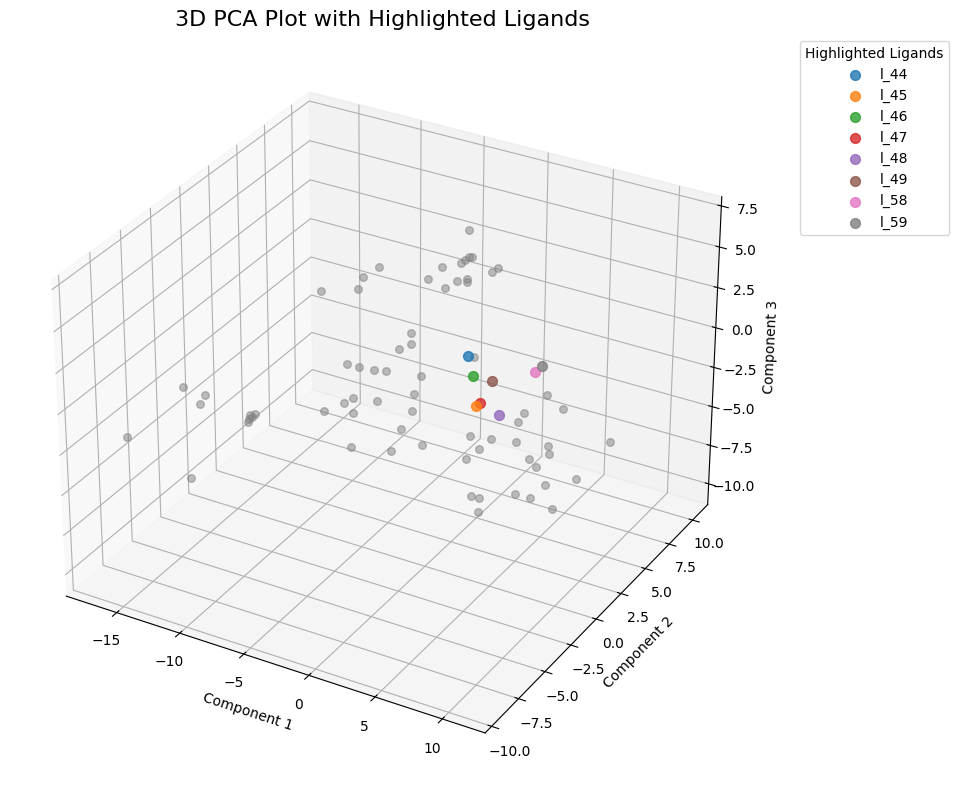

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify ligands to highlight
highlight_ligands = ['l_44', 'l_45', "l_46", "l_47", "l_48", "l_49", "l_58", "l_59"]

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data
for ligand in pca_df['ligand'].unique():
    subset = pca_df[pca_df['ligand'] == ligand]
    if ligand in highlight_ligands:
        ax.scatter(
            subset['Component 1'],
            subset['Component 2'],
            subset['Component 3'],
            label=ligand,
            s=50,  # Marker size
            alpha=0.8  # Transparency
        )
    else:
        ax.scatter(
            subset['Component 1'],
            subset['Component 2'],
            subset['Component 3'],
            color='gray',  # Default color for unhighlighted ligands
            s=30,
            alpha=0.5
        )

ax.set_title('3D PCA Plot with Highlighted Ligands', fontsize=16)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Highlighted Ligands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
import plotly.express as px

# Specify ligands to highlight
highlight_ligands = ['l_44', 'l_45', "l_46", "l_47", "l_48", "l_49", "l_58", "l_59"]

# Add a new column for color coding (highlight or default)
pca_df['color'] = pca_df['ligand'].apply(
    lambda x: x if x in highlight_ligands else 'Other'
)

# Create a 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='Component 1',
    y='Component 2',
    z='Component 3',
    color='color',
    title='Interactive 3D PCA Plot',
    labels={'color': 'Ligand'},
    symbol='color',  # Optional: use different symbols for highlighted ligands
    opacity=0.8
)

# Customize the layout
fig.update_layout(
    legend=dict(title='Ligand Categories'),
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

# Show the interactive plot
fig.show()